# World Cup Data Analysis, 1930 to 2014
## by (Mukthar Abdulwaheed)


## Investigation Overview


In this analysis, I wanted to look at performance of teams since the inception of world cup. The main focus was to get the best team over the years, goals, wins and also attendance rate.


## Dataset Overview

Data from all World Cup results (1930-2014), details for each match (Date, Stage, City, Ref, Home Team, Away Team, Goals, Goals at Half, etc), and details for events (year of each tournament, host nation, etc).

This is an exploration of 3 world cup datset that gives a detailed analysis of the most important events in the history of world cup.

- World Cup Matches is the first dataset with over 800 matches.
- World Cup Players is the next data with over 37,000 players details.
- World Cup Preview gives details of year of tournamnets, hosting country, total goals scored, winners, etc.

Steps taken to ensure proper report was ensuring all features were in their appropraite type, Germany FR was changed to Germany, and creaated 2 new columns to account for results of all matches played.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
matches = pd.read_csv(r'WorldCupMatches.csv')
preview = pd.read_csv(r'WorldCups_preview.csv')

In [4]:
# data wrangling 
# defining a function to create a new column where we to show the results of the home team 
def home_team(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Loss'
    else:
        return 'Draw'

matches = matches.assign(Home_Team_Results=matches.apply(home_team, axis=1))

In [6]:
# defining a function to create a new column where we to show the results of the away team 
def away_team(row):
    if row['Away Team Goals'] > row['Home Team Goals']:
        return 'Win'
    elif row['Away Team Goals'] < row['Home Team Goals']:
        return 'Loss'
    else:
        return 'Draw'
    
matches = matches.assign(Away_Team_Results=matches.apply(away_team, axis=1))

In [7]:
# Drop columns not needed
drop_columns = ['Win conditions', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']

matches = matches.drop(drop_columns, 1)

In [9]:
# drop the duplicates
matches.drop_duplicates(inplace=True)

In [10]:
# lets drop the missing value since its just 1
matches.dropna(inplace=True)

In [11]:
# rename 'Germany FR' to 'Germany'
matches['Home Team Name'] = matches['Home Team Name'].str.replace('Germany FR', 'Germany')
matches['Away Team Name'] = matches['Away Team Name'].str.replace('Germany FR', 'Germany')

In [12]:
# replace '.' with nothing for proper convertion in preview
preview['Attendance'] = preview['Attendance'].str.replace('.', '')

In [13]:
# let convert 'Attendance' to float now
preview['Attendance'] = preview['Attendance'].astype('int64')

In [15]:
# change 'Germany FR' to just 'Germany'
preview['Winner'] = preview['Winner'].str.replace('Germany FR', 'Germany')
preview['Runners-Up'] = preview['Runners-Up'].str.replace('Germany FR', 'Germany')
preview['Third'] = preview['Third'].str.replace('Germany FR', 'Germany')
preview['Fourth'] = preview['Fourth'].str.replace('Germany FR', 'Germany')

## Countries that have won the World Cup the most

- Brazil have won the most world cups 5
- Italy and Germany, 4 each
- Uruguay and Argentina, 2 each
- England, France and Spain, 1 each

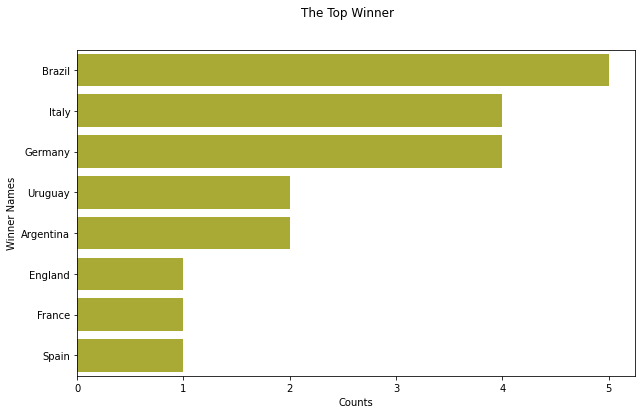

In [16]:
# create a function that would be used to check the univariate variable in preview dataset
def preview_visuals(data, variables):
    var = data[variables].value_counts()
    plt.figure(figsize=(10, 6))
    base_color = sb.color_palette()[8]
    sb.barplot(var.values, var.index, color=base_color)
    plt.suptitle('The Top {}'.format(variables))
    plt.xlabel('Counts')
    plt.ylabel('{} Names'.format(variables))
    plt.show();
    
    
preview_visuals(preview, 'Winner')

## The most Runner-up countries in World Cup History

The Runners-Up are;
1. Germany - 4
2. Argentina and Netherlands - 3 each
3. Czechoslovakia, Hungary, Brazil and Italy - 2 each
4. Sweden and France 

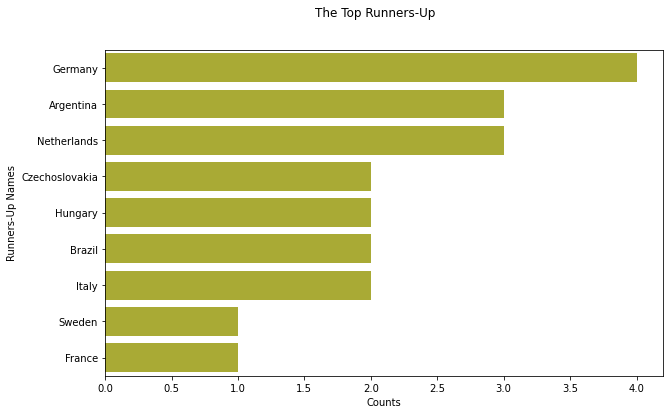

In [17]:
preview_visuals(preview, 'Runners-Up')

## Countries with most wins

TEAMS WITH HIGHEST WINS (Picking top 5)

Brazil (with 5 world cups)
Germany (4 world cups)
Argentina (2 world cups)
Italy (4 world cups)
England (1 world cup)



<AxesSubplot:xlabel='Home Team Name'>

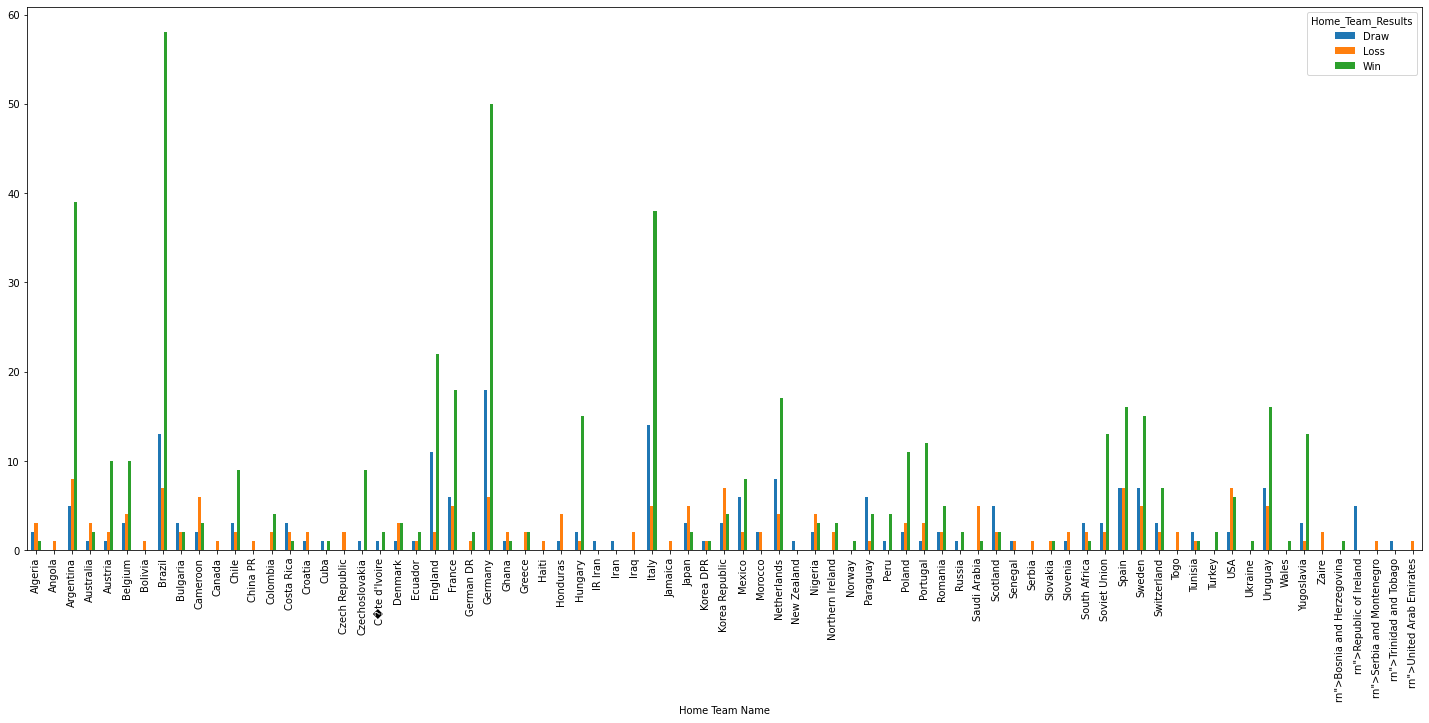

In [18]:
matches.groupby(['Home Team Name', 'Home_Team_Results'])['Home Team Name'].count().unstack().plot(kind = 'bar', stacked = False, figsize = (25,10))

## Side with the Highest Win Rate

Home Teams tends to win more, compared to Away Team

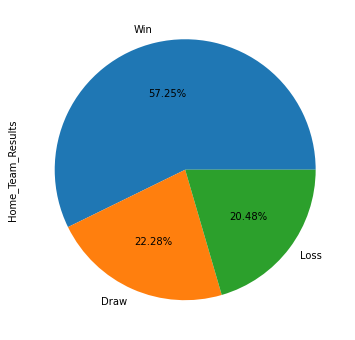

In [19]:
matches['Home_Team_Results'].value_counts().plot(kind='pie', autopct = '%1.2f%%', figsize = (6,6));

This is just mere confirmation to the plot above it. So we can say, since the inception of world cup, the probability of wining as the home side team is approximately 57%. And which is the same probability of lossing as the away team.

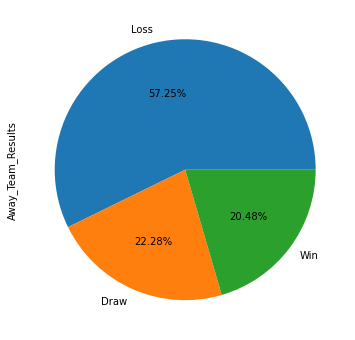

In [20]:
matches['Away_Team_Results'].value_counts().plot(kind='pie', autopct = '%1.2f%%', figsize = (6,6));

## Which tournament year have had the most goals?

The world cup tournament with most goals are;
1. 1998-France (171 goals)
1. 2014-Brazil (171 goals)
3. 2002-Korea/Japan (161 goals)
4. 2006-Germany (147 goals)
5. 1982-Spain (146 goals)

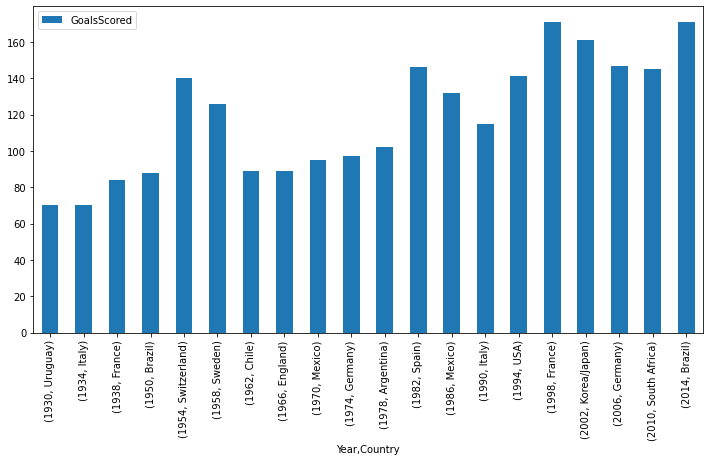

In [21]:
preview.groupby(['Year', 'Country'])['Country', 'GoalsScored'].sum().plot(kind='bar', figsize=[12, 6]);

## Stadiums with the Highest Attendance over the Years

Stadiums with the highest average attendance ever are;
1. Maracana - Estadio Jornalista Mario Filho located in Rio De Janeiro, Brazil(one of the cities with most appearance at world cup), over 100k+ average attendance.
2. Estadio Azteca in Mexico City, Mexico
3. Rose Bowl in California, USA
4. Wembley Stadium in London, England
5. Soccer City Stadium in Johannesburg, South Africa (also one of the cities with the most appearance at world cup), over 80+k average attendance.

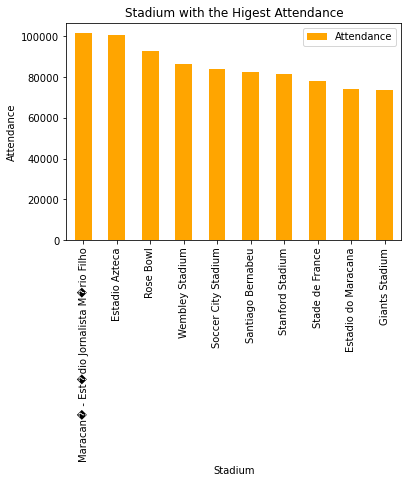

In [22]:
def average_attendance(data, variable):
    data_attendance = data.groupby(variable).Attendance.mean()
    data_attendance = data_attendance.to_frame().groupby(level=variable).Attendance.nlargest().to_frame()
    data_attendance.reset_index(level=1, inplace=True)
    data_attendance_sort = data_attendance.sort_values('Attendance', ascending=False)[:10]
    data_attendance_sort.plot.bar(color='orange', title='{} with the Higest Attendance'.format(variable), xlabel='{}'.format(variable), ylabel='Attendance');
    
average_attendance(matches, 'Stadium')   

## Cities with the Highest Attendance over the Years

Firstly, we can say that stadium such as Estadio Azteca in Mexico city, Mexico, Maracana in Rio De Janeiro, Brazil and Wembley in London, England are the major reason those cities have had lots of attendance at world cup.
The top 5 cities based on average attendance are;
1. Mexico city in Mexico
2. Los Angeles in USA
3. Rio De Janeiro in Brazil
4. London in England
5. San Francisco in USA

USA appearing twice need attention, perhaps the year USA hosted the world cup have been the year with most attendance ever in the history of world cup. This would be confirmed.

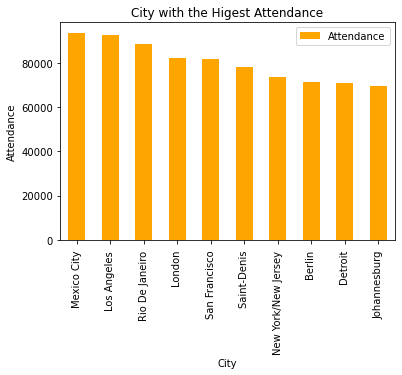

In [23]:
average_attendance(matches, 'City')

## Total Attendance in each Tournament Year

The world cup tournament with most attendance are;
1. 1994-USA (3,587,538)
2. 2014-Brazil (3,386,810)
3. 2006-Germany (3,359,439)
4. 2010-South Africa (3,178,856)
5. 1998-France (2,785,100)

So this is the reason USA cities were among the top cities with most attendance.

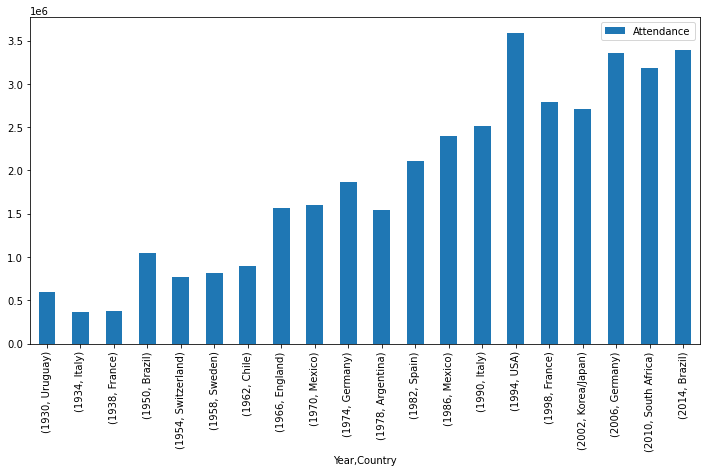

In [24]:
preview.groupby(['Year', 'Country'])['Country', 'Attendance'].sum().plot(kind='bar', figsize=[12, 6]);

In [26]:
!jupyter nbconvert Project_World-Cup_Part2.ipynb --to slides --post serve --no-input --no-prompt

^C
